# Spike Sandbox

The following Colaboratory notebook enables rapid proto-typing of C++ code for the Spike simulator. For an introduction to Spike, click [here](https://sites.google.com/view/spike-simulator/home)

To get started, you can simply run every cell up until the section entitled 'Sandbox'

After that, you will be able to edit, compile, and run C++ code for Spike simulations, using only the commands under Sandbox. The simulation generated if you run all of these cells without further edits is from the model, 'Simple Example', which you can find out more about [here](https://sites.google.com/view/spike-simulator/home/simple-example?authuser=0)

Everytime you want to make a further change to the Sandbox.cpp source code, begin at the top of the Sandbox section.

If you run into an issue and want to start from a clean installation, select 'Restart runtime...' under the 'Runtime' option. Then, begin at the top of this notebook under 'Setting up environment'.

*This Colaboratory notebook was created by members of the [Oxford Foundation for Theoretical Neuroscience and Artificial Intelligence](https://www.oftnai.org/). *

#Setup

## Setting up environment

The following lines of code are useful if you want to do a clean re-installation of Spike and its dependencies. If you are running this Colab document for the first time, you can skip to the !git clone cell, but running these commands will not cause any issues.

In [1]:
cd /content

/content


In [2]:
ls

sample_data/


In [0]:
rm -rf Spike #Run if Spike folder is present

In [4]:
!git clone https://github.com/OFTNAI/Spike #Note '!' is necessary in Colab to run shell commands
!apt update #apt = 'Advanced Package Tool'; checks the versions of various files and update as necessary
!apt install cmake

Cloning into 'Spike'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13288 (delta 0), reused 0 (delta 0), pack-reused 13284
Receiving objects: 100% (13288/13288), 59.51 MiB | 19.82 MiB/s, done.
Resolving deltas: 100% (10246/10246), done.
Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/c

In [5]:
!apt --fix-broken install #Run if an error message is returned following !apt update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [6]:
cd /content/Spike

/content/Spike


In [7]:
!git pull 
!git checkout master 

Already up to date.
Already on 'master'
Your branch is up to date with 'origin/master'.


In [8]:
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb; #wget downloads a file stored at a url
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb;
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub;
!apt-get update;
!apt-get install cuda gcc-5 g++-5 -y;
!apt install cuda-8.0;

--2019-07-29 15:31:11--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.182.215
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.182.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?EkDAlH57UJmVKBfXfqPjrsEpSu-izvv7VUYjJ6AN6QsCC8nYS1iWDLYqR2sYBjX9Z6damUEYbNIVSYOKbeePI298-oj7tGHe77cngeBFIpDyVxgZjF8VUoOgaGBeUNuoaCV9jnX5lMGgK5kMbiJeU9qk6ieXChLsCiG9Bk7FKeF7y3r7igjs7NbgAFaM1wl0TQHV_GKSpR50OTKgTXe5kIyBrA [following]
--2019-07-29 15:31:12--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?EkDAlH57UJmVKBfXfqPjrsEpSu-izvv7VUYjJ6AN6QsCC8nYS1iWDLYqR2sYBjX9Z6damUEYbNIVSYOKbeePI298-oj7

## Testing NVCC & CMake Setup

In [9]:
cd /content/Spike/Build

/content/Spike/Build


In [10]:
!/usr/local/cuda/bin/nvcc #'fatal' message is expected, as no input files given; note that 'NVCC' is NVIDA's compiling tool for CUDA

nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
nvcc fatal   : No input files specified; use option --help for more information


In [11]:
cd /content/Spike/Examples

/content/Spike/Examples


Write dummy Sandbox.cpp file to enable the first run of Cmake; note this file is overwritten later

In [12]:
%%writefile Sandbox.cpp


#include "Spike/Spike.hpp"

// Dummy Sandbox.cpp file

int main (int argc, char *argv[]){

  return 0;
}

Writing Sandbox.cpp


Over-write the original CMakeList taken from the Spike! repository with a reference to Sandbox

In [13]:
%%writefile CMakeLists.txt

foreach(example
    VogelsAbbottNet
    Brunel10K
    SimpleExample
    Sandbox
    )
  add_executable(${example} ${example}.cpp)
  target_link_libraries(${example}
    Spike
  )
if (BUILD_WITH_CUDA)
    target_link_libraries(${example}
      ${CUDA_LIBRARIES}
      )
    set_target_properties(${experiment} PROPERTIES COMPILE_FLAGS "-DSPIKE_WITH_CUDA -std=c++11")
  endif()
  #target_link_libraries(${example} Spike) # ${OPENCL_LIBRARIES} ${Boost_LIBRARIES})
endforeach()

Overwriting CMakeLists.txt


In [14]:
cd /content/Spike/Build/

/content/Spike/Build


In [0]:
!rm -rf * #rm = remove; r = remove directory and its contents recursively; f = force (do so wihtout prompts)

In [16]:
!cmake -DCMAKE_CXX_COMPILER=g++-5 -DCMAKE_C_COMPILER=gcc-5 ../

-- The C compiler identification is GNU 5.5.0
-- The CXX compiler identification is GNU 5.5.0
-- Check for working C compiler: /usr/bin/gcc-5
-- Check for working C compiler: /usr/bin/gcc-5 -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/g++-5
-- Check for working CXX compiler: /usr/bin/g++-5 -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threads: TRUE  
-- Found CUDA: /usr/local/cuda (found version "8.0") 
-

In [17]:
!rm /usr/local/cuda/bin/gcc;
!rm /usr/local/cuda/bin/g++;
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc; #ln -s creates a symbolic link, essentially such that if something is queried at a location (which now no longer exists), the link points to a new location
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++;

rm: cannot remove '/usr/local/cuda/bin/gcc': No such file or directory
rm: cannot remove '/usr/local/cuda/bin/g++': No such file or directory


In [18]:
!make -j8 #j8 specifies that 8 jobs should be simultaneously execuded by the makefile

Scanning dependencies of target SpikeCUDA
Scanning dependencies of target SpikeDummy
[  1%] Building /content/Spike/Spike/Backend/CUDA/Synapses/VoltageSpikingSynapses.cu
[  2%] Building /content/Spike/Spike/Backend/CUDA/CUDABackend.cu
[  3%] Building /content/Spike/Spike/Backend/CUDA/Helpers/RandomStateManager.cu
[  4%] Building /content/Spike/Spike/Backend/CUDA/Helpers/Memory.cu
[  5%] Building /content/Spike/Spike/Backend/CUDA/ActivityMonitor/SpikingActivityMonitor.cu
[  6%] Building /content/Spike/Spike/Backend/CUDA/ActivityMonitor/RateActivityMonitor.cu
Building NVCC Device object /content/Spike/Spike/Backend/CUDA/Synapses/VoltageSpikingSynapses.cu
[  7%] Building /content/Spike/Spike/Backend/CUDA/ActivityMonitor/ActivityMonitor.cu
Building NVCC Device object /content/Spike/Spike/Backend/CUDA/ActivityMonitor/SpikingActivityMonitor.cu
Building NVCC Device object /content/Spike/Spike/Backend/CUDA/Helpers/Memory.cu
Building NVCC Device object /content/Spike/Spike/Backend/CUDA/CUDABack

In [0]:
import numpy as np
import pandas as pd #Pandas has multiple functions, including providing 'data_frame' objects that can be used for visualizing and analyzing data
from matplotlib import pyplot as plt

%matplotlib inline 
# 'percentage sign' matplotlib is a 'magic function' in Colab that enables the outputs of matplotlib to the command line, including figures

# Sandbox

## Edit and Compile Sandbox.cpp

Everytime you want to edit Sandbox.cpp, make sure to change directory with the command below before executing the writefile command. If you forget to do this, a new .cpp file will be created in the wrong directory.

In [20]:
cd /content/Spike/Examples

/content/Spike/Examples


Over-write the Sandbox.cpp file with the desired code. All code must be inserted below the ''%%writefile Sandbox.cpp' line

In [21]:
%%writefile Sandbox.cpp



#include "Spike/Spike.hpp"

// The function which will autorun when the executable is created
int main (int argc, char *argv[]){

  /*
      CHOOSE THE COMPONENTS OF YOUR SIMULATION
  */

  // Create an instance of the Model
  SpikingModel* ExampleModel = new SpikingModel();
    

  // Set up the simulator with a timestep at which the neuron, synapse and STDP properties will be calculated 
  float timestep = 0.0001;  // In seconds
  ExampleModel->SetTimestep(timestep);


  // Choose an input neuron type
  GeneratorInputSpikingNeurons* generator_input_neurons = new GeneratorInputSpikingNeurons();
  // PoissonInputSpikingNeurons* input neurons = new PoissonInputSpikingNeurons();

  // Choose your neuron type
  LIFSpikingNeurons* lif_spiking_neurons = new LIFSpikingNeurons();

  // Choose your synapse type
  ConductanceSpikingSynapses * conductance_spiking_synapses = new ConductanceSpikingSynapses();
  // VoltageSpikingSynapses * voltage_spiking_synapses = new VoltageSpikingSynapses();
  // CurrentSpikingSynapses * current_spiking_synapses = new CurrentSpikingSynapses();

  // Allocate your chosen components to the simulator
  ExampleModel->input_spiking_neurons = generator_input_neurons;
  ExampleModel->spiking_neurons = lif_spiking_neurons;
  ExampleModel->spiking_synapses = conductance_spiking_synapses;

  /*
      ADD ANY ACTIVITY MONITORS OR PLASTICITY RULES YOU WISH FOR 
  */
  SpikingActivityMonitor* spike_monitor = new SpikingActivityMonitor(lif_spiking_neurons);
  SpikingActivityMonitor* input_spike_monitor = new SpikingActivityMonitor(generator_input_neurons);
  ExampleModel->AddActivityMonitor(spike_monitor);
  ExampleModel->AddActivityMonitor(input_spike_monitor);

  /*
      SETUP PROPERTIES AND CREATE NETWORK:
    
    Note: 
    All Neuron, Synapse and STDP types have associated parameters structures.
    These structures are defined in the header file for that class and allow us to set properties.
  */

  // SETTING UP INPUT NEURONS
  // Creating an input neuron parameter structure
  generator_input_spiking_neuron_parameters_struct* input_neuron_params = new generator_input_spiking_neuron_parameters_struct();
  // Setting the dimensions of the input neuron layer
  input_neuron_params->group_shape[0] = 1;    // x-dimension of the input neuron layer
  input_neuron_params->group_shape[1] = 10;   // y-dimension of the input neuron layer
  // Create a group of input neurons. This function returns the ID of the input neuron group
  int input_layer_ID = ExampleModel->AddInputNeuronGroup(input_neuron_params);

  // SETTING UP NEURON GROUPS
  // Creating an LIF parameter structure for an excitatory neuron population and an inhibitory
  // 1 x 100 Layer
  lif_spiking_neuron_parameters_struct * excitatory_population_params = new lif_spiking_neuron_parameters_struct();
  excitatory_population_params->group_shape[0] = 1;
  excitatory_population_params->group_shape[1] = 100;
  excitatory_population_params->resting_potential_v0 = -0.074f;
  excitatory_population_params->threshold_for_action_potential_spike = -0.053f;
  excitatory_population_params->somatic_capacitance_Cm = 500.0*pow(10, -12);
  excitatory_population_params->somatic_leakage_conductance_g0 = 25.0*pow(10, -9);

  lif_spiking_neuron_parameters_struct * inhibitory_population_params = new lif_spiking_neuron_parameters_struct();
  inhibitory_population_params->group_shape[0] = 1;
  inhibitory_population_params->group_shape[1] = 100;
  inhibitory_population_params->resting_potential_v0 = -0.082f;
  inhibitory_population_params->threshold_for_action_potential_spike = -0.053f;
  inhibitory_population_params->somatic_capacitance_Cm = 214.0*pow(10, -12);
  inhibitory_population_params->somatic_leakage_conductance_g0 = 18.0*pow(10, -9);

  // Create populations of excitatory and inhibitory neurons
  int excitatory_neuron_layer_ID = ExampleModel->AddNeuronGroup(excitatory_population_params);
  int inhibitory_neuron_layer_ID = ExampleModel->AddNeuronGroup(inhibitory_population_params);


  // SETTING UP SYNAPSES
  // Creating a synapses parameter structure for connections from the input neurons to the excitatory neurons
  conductance_spiking_synapse_parameters_struct* input_to_excitatory_parameters = new conductance_spiking_synapse_parameters_struct();
  input_to_excitatory_parameters->weight_range[0] = 0.5f;   // Create uniform distributions of weights [0.5, 10.0]
  input_to_excitatory_parameters->weight_range[1] = 10.0f;
  input_to_excitatory_parameters->weight_scaling_constant = excitatory_population_params->somatic_leakage_conductance_g0;
  input_to_excitatory_parameters->delay_range[0] = 8*timestep;    // Create uniform distributions of delays [1 timestep, 5 timesteps]
  input_to_excitatory_parameters->delay_range[1] = 8*timestep;
  // The connectivity types for synapses include:
    // CONNECTIVITY_TYPE_ALL_TO_ALL
    // CONNECTIVITY_TYPE_ONE_TO_ONE
    // CONNECTIVITY_TYPE_RANDOM
    // CONNECTIVITY_TYPE_PAIRWISE
  input_to_excitatory_parameters->connectivity_type = CONNECTIVITY_TYPE_ALL_TO_ALL;
  //input_to_excitatory_parameters->plasticity_vec.push_back(STDP_RULE);

  // Creating a set of synapse parameters for connections from the excitatory neurons to the inhibitory neurons
  conductance_spiking_synapse_parameters_struct * excitatory_to_inhibitory_parameters = new conductance_spiking_synapse_parameters_struct();
  excitatory_to_inhibitory_parameters->weight_range[0] = 10.0f;
  excitatory_to_inhibitory_parameters->weight_range[1] = 10.0f;
  excitatory_to_inhibitory_parameters->weight_scaling_constant = inhibitory_population_params->somatic_leakage_conductance_g0;
  excitatory_to_inhibitory_parameters->delay_range[0] = 5.0*timestep;
  excitatory_to_inhibitory_parameters->delay_range[1] = 3.0f*pow(10, -3);
  excitatory_to_inhibitory_parameters->connectivity_type = CONNECTIVITY_TYPE_ONE_TO_ONE;

  // Creating a set of synapse parameters from the inhibitory neurons to the excitatory neurons
  conductance_spiking_synapse_parameters_struct * inhibitory_to_excitatory_parameters = new conductance_spiking_synapse_parameters_struct();
  inhibitory_to_excitatory_parameters->weight_range[0] = -5.0f;
  inhibitory_to_excitatory_parameters->weight_range[1] = -2.5f;
  inhibitory_to_excitatory_parameters->weight_scaling_constant = excitatory_population_params->somatic_leakage_conductance_g0;
  inhibitory_to_excitatory_parameters->delay_range[0] = 5.0*timestep;
  inhibitory_to_excitatory_parameters->delay_range[1] = 3.0f*pow(10, -3);
  inhibitory_to_excitatory_parameters->connectivity_type = CONNECTIVITY_TYPE_ALL_TO_ALL;
  

  // CREATING SYNAPSES
  // When creating synapses, the ids of the presynaptic and postsynaptic populations are all that are required
  // Note: Input neuron populations cannot be post-synaptic on any synapse
  ExampleModel->AddSynapseGroup(input_layer_ID, excitatory_neuron_layer_ID, input_to_excitatory_parameters);
  ExampleModel->AddSynapseGroup(excitatory_neuron_layer_ID, inhibitory_neuron_layer_ID, excitatory_to_inhibitory_parameters);
  ExampleModel->AddSynapseGroup(inhibitory_neuron_layer_ID, excitatory_neuron_layer_ID, inhibitory_to_excitatory_parameters);


  /*
      ADD INPUT STIMULI TO THE GENERATOR NEURONS CLASS
  */
  // We can now assign a set of spike times to neurons in the input layer
  int s1_num_spikes = 5;
  int s1_neuron_ids[5] = {0, 1, 3, 6, 7};
  float s1_spike_times[5] = {0.1f, 0.3f, 0.2f, 0.5f, 0.9f};
  // Adding this stimulus to the input neurons
  int first_stimulus = generator_input_neurons->add_stimulus(s1_num_spikes, s1_neuron_ids, s1_spike_times);
  // Creating a second stimulus
  int s2_num_spikes = 5;
  int s2_neuron_ids[5] = {2, 5, 9, 8, 0};
  float s2_spike_times[5] = {5.01f, 6.9f, 7.2f, 8.5f, 9.9f};
  int second_stimulus = generator_input_neurons->add_stimulus(s2_num_spikes, s2_neuron_ids, s2_spike_times);
  


  /*
      RUN THE SIMULATION
  */

  // The only argument to run is the number of seconds
  ExampleModel->finalise_model();
  float simtime = 50.0f;
  generator_input_neurons->select_stimulus(first_stimulus);
  ExampleModel->run(simtime);

  generator_input_neurons->select_stimulus(second_stimulus);
  ExampleModel->run(simtime);
  

  spike_monitor->save_spikes_as_binary("./", "main_spikes");
  input_spike_monitor->save_spikes_as_binary("./", "input_spikes");
  ExampleModel->spiking_synapses->save_connectivity_as_txt("./");

  return 0;
}


Overwriting Sandbox.cpp


In [22]:
cd /content/Spike/Build/Examples

/content/Spike/Build/Examples


In [23]:
!make Sandbox #Recompile the edited Sandbox.cpp file

[  1%] Linking SpikeCUDA
Linking CXX executable SpikeCUDA
nvlink warning : Function '_ZN7Backend4CUDA44conductance_spiking_current_injection_kernelEPNS0_28spiking_synapses_data_structEPNS0_27spiking_neurons_data_structEffffii' has address taken but no possible call to it
nvlink warning : Function '_ZN7Backend4CUDA40current_spiking_current_injection_kernelEPNS0_28spiking_synapses_data_structEPNS0_27spiking_neurons_data_structEffffii' has address taken but no possible call to it
nvlink warning : Function '_ZN7Backend4CUDA32spiking_current_injection_kernelEPNS0_28spiking_synapses_data_structEPNS0_27spiking_neurons_data_structEffffii' has address taken but no possible call to it
nvlink warning : Function '_ZN7Backend4CUDA19get_active_synapsesEPNS0_28spiking_synapses_data_structEPNS0_27spiking_neurons_data_structEiiib' has address taken but no possible call to it
nvlink warning : Function '_ZN7Backend4CUDA40voltage_spiking_current_injection_kernelEPNS0_28spiking_synapses_data_structEPNS0_27

## Run and Visualize Simulation

In [24]:
!./Sandbox


-----------
---SPIKE---
-----------

Building Model with:
  10 Input Neuron(s)
  200 Neuron(s)
  11100 Synapse(s)
  2 Activity Monitor(s)

Selecting Stimulus: 0
Running model for 50.000000 seconds 
 Number of Spikes Recorded: 208
 Number of Spikes Recorded: 5
Selecting Stimulus: 1
Running model for 50.000000 seconds 
 Number of Spikes Recorded: 208
 Number of Spikes Recorded: 5


In [25]:
ls

Brunel10K*                  main_spikesSpikeIDs.bin    Sandbox*
CMakeFiles/                 main_spikesSpikeTimes.bin  SimpleExample*
cmake_install.cmake         Makefile                   SynapticDelays.txt
input_spikesSpikeIDs.bin    PostsynapticIDs.txt        SynapticWeights.txt
input_spikesSpikeTimes.bin  PresynapticIDs.txt         VogelsAbbottNet*


In [0]:
main_df = pd.DataFrame(
  data = {
      "ids": np.fromfile("main_spikesSpikeIDs.bin", dtype=np.int32),
      "times": np.fromfile("main_spikesSpikeTimes.bin", dtype=np.float32),
  }
)

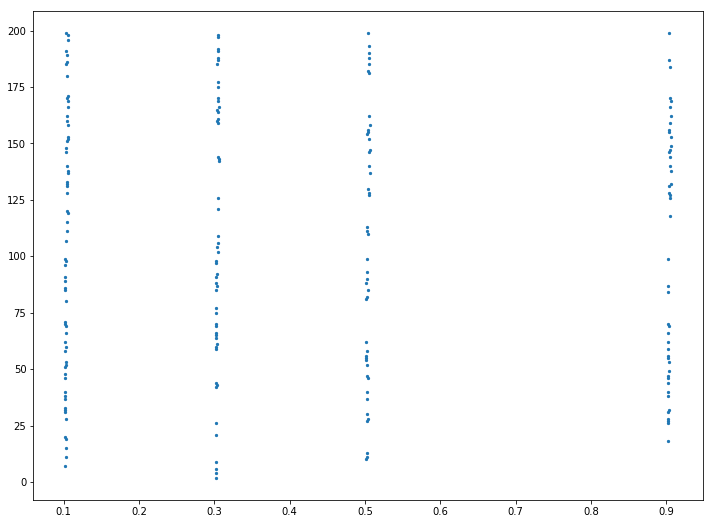

In [27]:
plt.figure(figsize=(12,9))
mask = main_df["times"] < 1.0
plt.scatter(main_df["times"][mask], main_df["ids"][mask], s=5)

##Download Data

###Download Method for Smaller Files

In [0]:
from google.colab import files
files.download('main_spikesSpikeIDs.bin') 

In [0]:
from google.colab import files
files.download('main_spikesSpikeTimes.bin') 

###Download Method for Larger Files

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
cp *.txt ../../../gdrive/My\ Drive/